In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.optimize import minimize

-----------------------

### Domestic Portfolio with one International Security and one Cryptocurrency
-----------

In [95]:
JYOTHILAB = yf.download("JYOTHYLAB.NS",start='2023-03-31',end='2024-04-01')['Adj Close']

AJANTPHARM = yf.download("AJANTPHARM.NS",start='2023-03-31',end='2024-04-01')['Adj Close']

PATANJALI = yf.download("PATANJALI.NS",start='2023-03-31',end='2024-04-01')['Adj Close']

TATASTEEL = yf.download("TATASTEEL.NS",start='2023-03-31',end='2024-04-01')['Adj Close']

EIDPARRY = yf.download("EIDPARRY.NS",start='2023-03-31',end='2024-04-01')['Adj Close']

GLS = yf.download("GLS.BO",start='2023-03-31',end='2024-04-01')['Adj Close']

INDIACEM = yf.download("INDIACEM.NS",start='2023-03-31',end='2024-04-01')['Adj Close']

TBILL = pd.read_csv("India 1-Year Bond Yield Historical Data.csv")

MSFT = yf.download("MSFT",start='2023-04-01',end='2024-03-31')['Adj Close']

BTC = yf.download("BTC-USD",start='2023-04-01',end='2024-03-31')['Adj Close']



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [96]:
# TBILL
TBILL['Date'] = pd.to_datetime(TBILL['Date'], format='%d-%m-%Y')
TBILL.set_index('Date', inplace=True)
TBILL = TBILL.sort_index()
TBILL = TBILL["Price"]
TBILL

Date
2023-04-03    7.124
2023-04-05    7.114
2023-04-06    6.950
2023-04-10    6.920
2023-04-11    6.935
              ...  
2024-03-21    7.084
2024-03-22    7.099
2024-03-26    7.107
2024-03-27    7.089
2024-03-28    6.975
Name: Price, Length: 240, dtype: float64

In [97]:
portfolio = pd.concat([JYOTHILAB,AJANTPHARM,PATANJALI,TATASTEEL,EIDPARRY,GLS,INDIACEM, TBILL, MSFT, BTC],axis=1)
portfolio.columns = ['JYOTHILAB','AJANTPHARM','PATANJALI','TATASTEEL', 'EIDPARRY','GLS','INDIACEM', 'TBILL', 'MSFT', 'BTC']

Text(0.5, 1.0, 'Domestic Portfolio + International Security + Cryptocurrency')

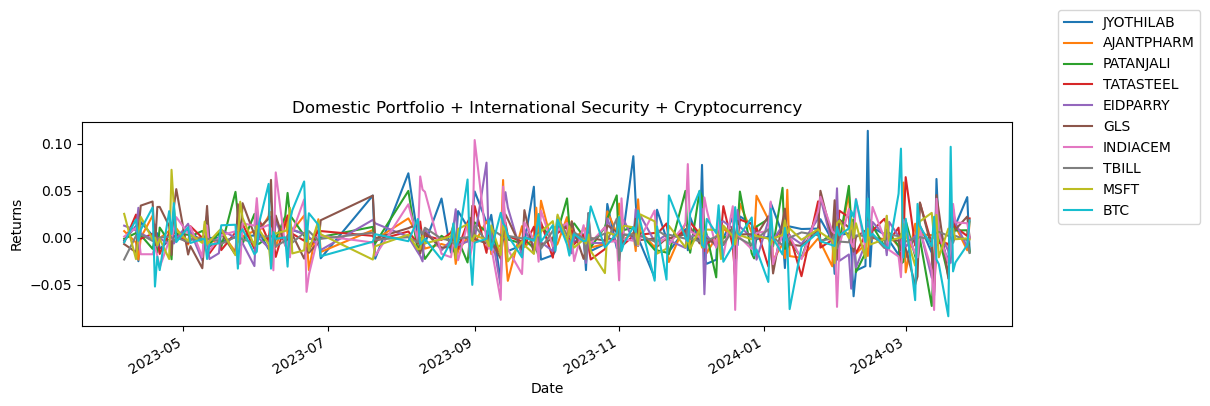

In [98]:
portfolio_returns = portfolio.pct_change(1, fill_method=None).dropna()
portfolio_returns.plot(figsize=(12,3))
plt.legend(loc=(1.05,0.5))
plt.ylabel('Returns')
plt.title('Domestic Portfolio + International Security + Cryptocurrency')

#### Calculating Log returns

In [99]:
log_rets = np.log(1 + portfolio.pct_change(1, fill_method=None))
log_rets.dropna(inplace=True)
log_rets_cov = log_rets.cov() 


### Variance-Covariance Matrix

In [100]:
log_rets_cov

,JYOTHILAB,AJANTPHARM,PATANJALI,TATASTEEL,EIDPARRY,GLS,INDIACEM,TBILL,MSFT,BTC
JYOTHILAB,0.000584,2.507568e-05,0.000144,0.000058,1.155014e-04,8.903338e-05,0.000143,0.000022,5.765200e-06,0.000018
AJANTPHARM,0.000025,3.000578e-04,0.000053,0.000030,2.051192e-06,3.450402e-05,0.000068,-0.000021,5.918371e-07,-0.000028
PATANJALI,0.000144,5.315484e-05,0.000399,0.000089,8.052785e-05,9.886966e-05,0.000152,0.000005,-1.098258e-05,-0.000038
TATASTEEL,0.000058,3.037653e-05,0.000089,0.000225,5.483710e-05,4.929798e-05,0.000143,-0.000011,1.254582e-05,-0.000035
EIDPARRY,0.000116,2.051192e-06,0.000081,0.000055,3.631314e-04,8.204707e-05,0.000094,-0.000012,8.889237e-07,-0.000077
GLS,0.000089,3.450402e-05,0.000099,0.000049,8.204707e-05,3.550246e-04,0.000152,0.000003,-2.996093e-07,-0.000027
INDIACEM,0.000143,6.802416e-05,0.000152,0.000143,9.355550e-05,1.519607e-04,0.000722,0.000028,1.082932e-05,-0.000053
TBILL,0.000022,-2.064455e-05,0.000005,-0.000011,-1.193371e-05,3.318707e-06,0.000028,0.000042,-5.780141e-06,0.000004
MSFT,0.000006,5.918371e-07,-0.000011,0.000013,8.889237e-07,-2.996093e-07,0.000011,-0.000006,2.102998e-04,0.000028
BTC,0.000018,-2.808483e-05,-0.000038,-0.000035,-7.664808e-05,-2.722099e-05,-0.000053,0.000004,2.840332e-05,0.000680


### Weighted Return

In [101]:
N = len(portfolio_returns.columns)
equal_weights = N*[1/N]

In [102]:
def gen_weights(N):
    weights = np.random.random(N)
    return weights/ np.sum(weights)

def calculate_returns(weights,log_rets):
    return np.sum(log_rets.mean()*weights) * 252

def calculate_volatility(weights,log_rets_cov):
    annualized_cov = np.dot(log_rets_cov*252,weights)
    vol = np.dot(weights.transpose(),annualized_cov)
    return np.sqrt(vol)

In [103]:
mc_portfolio_returns = []
mc_portfolio_vol = []
mc_weights = []
for sim in range(10000):
    # This may take awhile!
    weights = gen_weights(N=10)
    mc_weights.append(weights)
    mc_portfolio_returns.append(calculate_returns(weights,log_rets))
    mc_portfolio_vol.append(calculate_volatility(weights,log_rets_cov))

In [104]:
mc_sharpe_ratios = np.array(mc_portfolio_returns)/np.array(mc_portfolio_vol)

### Efficient Frontier and Tangency Calculations

In [105]:
expected_returns_range = np.linspace(0.1, 0.6, 100)  # Adjusted based on your data
bounds = tuple((0, 1) for _ in range(N))  # Assuming no short-selling
frontier_volatility = []
frontier_weights = []

for possible_return in expected_returns_range:
    constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1},
                    {'type': 'eq', 'fun': lambda weights: calculate_returns(weights, log_rets) - possible_return})

    result = minimize(calculate_volatility, equal_weights, args=(log_rets_cov,), bounds=bounds, constraints=constraints)
    frontier_volatility.append(result['fun'])
    frontier_weights.append(result['x'])

risk_free_rate = 0.068  # Risk-free rate
frontier_sharpe_ratios = [(ret - risk_free_rate) / vol for ret, vol in zip(expected_returns_range, frontier_volatility)]

### Minimum Variance Portfolio Calculations

In [106]:
# Constraints for minimum variance portfolio (sum of weights must equal 1)
constraints_mvp = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

# Bounds for no short-selling (0 to 1 for each weight)
bounds_mvp = tuple((0, 1) for _ in range(N))  # Change to (-1, 1) for short-selling

# Minimize portfolio volatility to find the Minimum Variance Portfolio
mvp_result = minimize(calculate_volatility, equal_weights, args=(log_rets_cov,), 
                      method='SLSQP', bounds=bounds_mvp, constraints=constraints_mvp)


# Extract the Minimum Variance Portfolio's volatility, returns, and weights
mvp_volatility = mvp_result['fun']  # The minimized volatility
mvp_weights = mvp_result['x']       # Weights of the minimum variance portfolio
mvp_return = calculate_returns(mvp_weights, log_rets)

# Extract the Minimum Variance Portfolio's weights
mvp_weights = mvp_result['x']

# Output the weights of the Minimum Variance Portfolio
print("Minimum Variance Portfolio Weights:")
for i, weight in enumerate(mvp_weights):
    print(f"{portfolio.columns[i]}: {weight:.4f}")

print(f"\nMinimum Variance Portfolio Return: {mvp_return:.4f}")
print(f"Minimum Variance Portfolio Volatility (Risk): {mvp_volatility:.4f}")

Minimum Variance Portfolio Weights:
JYOTHILAB: 0.0000
AJANTPHARM: 0.1012
PATANJALI: 0.0000
TATASTEEL: 0.0858
EIDPARRY: 0.0662
GLS: 0.0186
INDIACEM: 0.0000
TBILL: 0.5863
MSFT: 0.1030
BTC: 0.0390

Minimum Variance Portfolio Return: 0.1942
Minimum Variance Portfolio Volatility (Risk): 0.0720


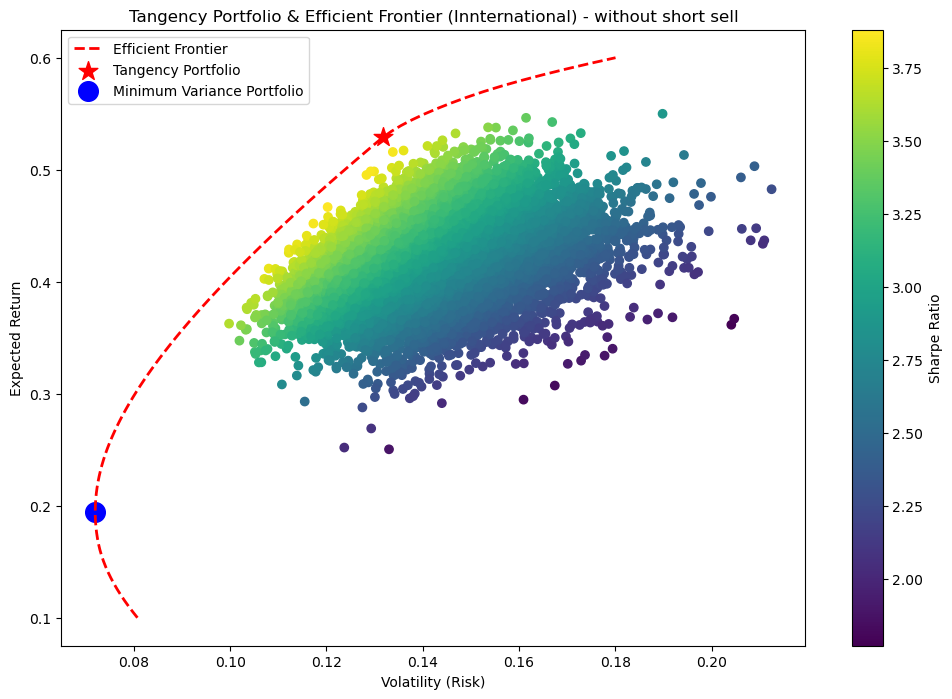

Tangency Portfolio Return: 0.5292929292929294
Tangency Portfolio Volatility: 0.13183051770856746
Maximum Sharpe Ratio: 3.4991361432160306


In [107]:
plt.figure(figsize=(12, 8))
plt.scatter(mc_portfolio_vol, mc_portfolio_returns, c=mc_sharpe_ratios, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Expected Return')

# Plot the Efficient Frontier
plt.plot(frontier_volatility, expected_returns_range, 'r--', linewidth=2, label='Efficient Frontier')

# Tangency Portfolio Calculation
risk_free_rate = 0.068  

# Find the index of the maximum Sharpe ratio on the efficient frontier
max_sharpe_idx = np.argmax(frontier_sharpe_ratios)
tangency_volatility = frontier_volatility[max_sharpe_idx]
tangency_return = expected_returns_range[max_sharpe_idx]

# Highlight the Tangency Portfolio on the Efficient Frontier
plt.scatter(tangency_volatility, tangency_return, color='red', marker='*', s=200, label='Tangency Portfolio')

# Plot the Minimum Variance Portfolio
plt.scatter(mvp_volatility, mvp_return, color='blue', marker='o', s=200, label='Minimum Variance Portfolio')

# Plot labels and legend
plt.legend()
plt.title('Tangency Portfolio & Efficient Frontier (Innternational) - without short sell')
plt.show()

# Output Tangency Portfolio details
print(f"Tangency Portfolio Return: {tangency_return}")
print(f"Tangency Portfolio Volatility: {tangency_volatility}")
print(f"Maximum Sharpe Ratio: {frontier_sharpe_ratios[max_sharpe_idx]}")

In [108]:
 # Weights of Tangency Portfolio
tangency_weights = frontier_weights[max_sharpe_idx]
tangency_weights

# tangency_weights = mc_weights[np.argmax(mc_sharpe_ratios)]
# tangency_weights

array([7.30949039e-02, 1.46279021e-01, 7.56925115e-02, 1.20176680e-01,
       0.00000000e+00, 1.93546018e-01, 0.00000000e+00, 6.28837260e-18,
       2.89786764e-01, 1.01424102e-01])

-----------------------

### NIFTY 50 INDEX Fund Returns Analysis
-----------


In [109]:
INDEX = yf.download("^NSEI", start="2023-03-31", end="2024-04-01")

[*********************100%%**********************]  1 of 1 completed


Text(0.5, 1.0, 'NIFTY 50')

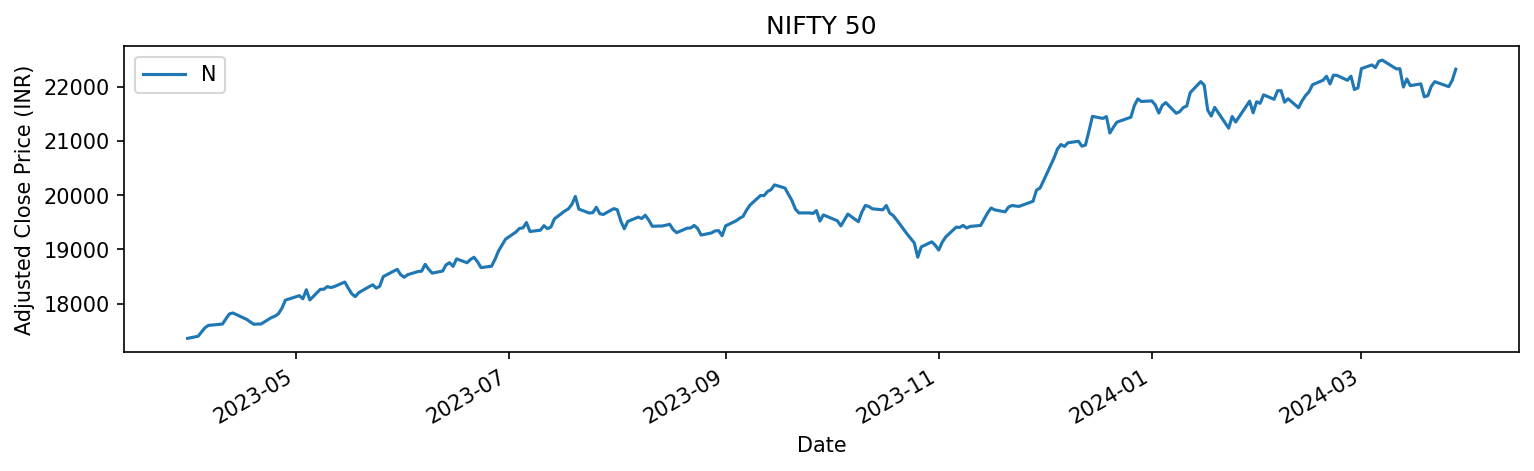

In [110]:
plt.figure(dpi=150)
INDEX['Adj Close'].plot(figsize=(12,3))
plt.ylabel("Adjusted Close Price (INR)")
plt.legend("NIFTY50")
plt.title('NIFTY 50')

In [111]:
def compute_sharpe_ratio(data, risk_free_rate = 0.000249931):
    mean_return = data["Adj Close"].pct_change(1).mean()
    std = data["Adj Close"].pct_change(1).std()
    sharpe_ratio = (mean_return-risk_free_rate) / std
    return (252**0.5) *sharpe_ratio

In [112]:
compute_sharpe_ratio(INDEX)

2.0529449337389094

### NIFTY50 Cummulative Returns

In [113]:
index_returns = INDEX["Adj Close"].pct_change(1).dropna()
index_cumm_returns = (index_returns + 1).cumprod()

Text(0.5, 1.0, 'NIFTY 50')

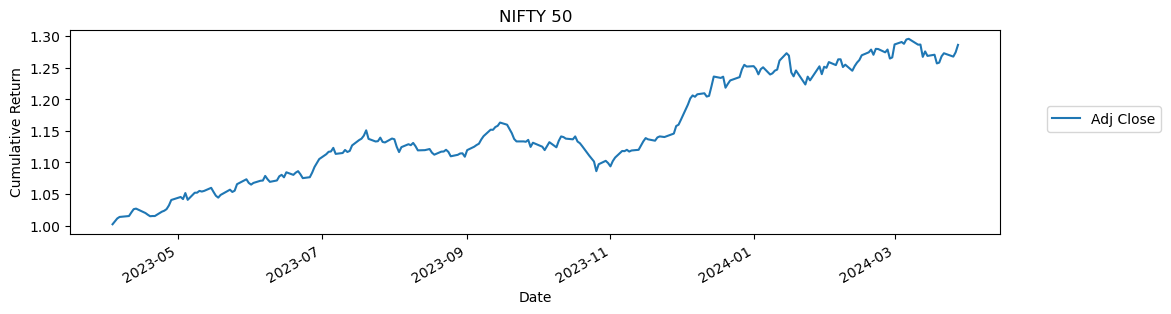

In [114]:
index_cumm_returns.plot(figsize=(12,3))
plt.legend(loc=(1.05,0.5))
plt.ylabel('Cumulative Return')
plt.title('NIFTY 50')

### Tangency Portfolio vs NIFTY50

In [115]:
weighted_returns = log_rets * tangency_weights
tangency_portfolio_daily_returns = weighted_returns.sum(axis=1)
tangency_cumulative_returns = (1 + tangency_portfolio_daily_returns).cumprod()

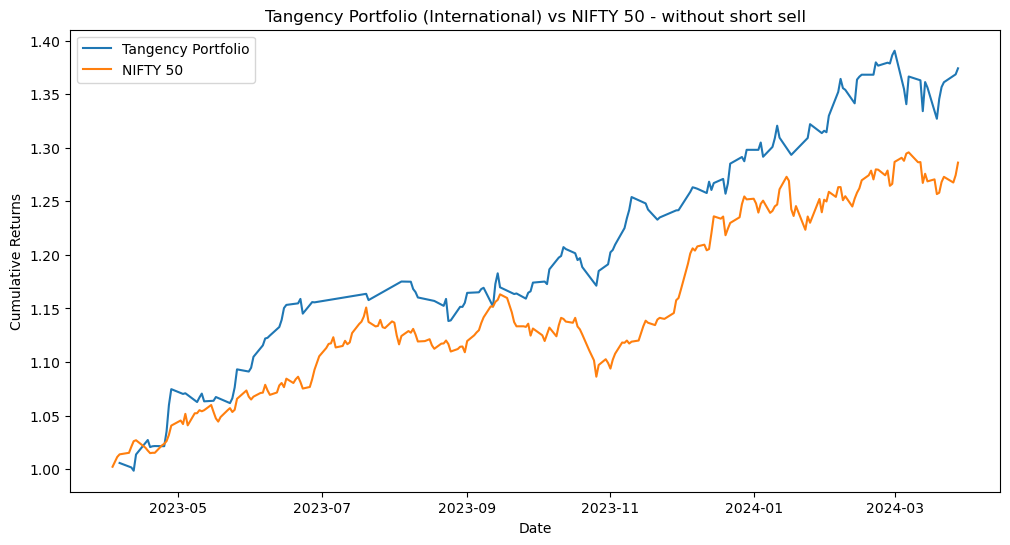

In [116]:
plt.figure(figsize=(12,6))
plt.plot(tangency_cumulative_returns, label='Tangency Portfolio')
plt.plot(index_cumm_returns, label='NIFTY 50')
plt.title('Tangency Portfolio (International) vs NIFTY 50 - without short sell')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

-----------------------

### Short Selling (International)
-----------

In [117]:
def gen_weights(N):
    weights = np.random.uniform(-1, 1, N)
    # Normalize the weights to ensure they sum to 1
    return weights / np.sum(np.abs(weights)) 

def calculate_returns(weights,log_rets):
    return np.sum(log_rets.mean()*weights) * 252

def calculate_volatility(weights,log_rets_cov):
    annualized_cov = np.dot(log_rets_cov*252,weights)
    vol = np.dot(weights.transpose(),annualized_cov)
    return np.sqrt(vol)

In [118]:
mc_portfolio_returns = []
mc_portfolio_vol = []
mc_weights = []
for sim in range(10000):
    # This may take awhile!
    weights = gen_weights(N=10)
    mc_weights.append(weights)
    mc_portfolio_returns.append(calculate_returns(weights,log_rets))
    mc_portfolio_vol.append(calculate_volatility(weights,log_rets_cov))

In [119]:
mc_sharpe_ratios = np.array(mc_portfolio_returns)/np.array(mc_portfolio_vol)

In [120]:
expected_returns_range = np.linspace(0.1, 0.6, 100)  # Adjusted based on your data
bounds = tuple((-1, 1) for _ in range(N))  # Assuming no short-selling
frontier_volatility = []
frontier_weights = []

for possible_return in expected_returns_range:
    constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1},
                    {'type': 'eq', 'fun': lambda weights: calculate_returns(weights, log_rets) - possible_return})

    result = minimize(calculate_volatility, equal_weights, args=(log_rets_cov,), bounds=bounds, constraints=constraints)
    frontier_volatility.append(result['fun'])
    frontier_weights.append(result['x'])

risk_free_rate = 0.068  # Risk-free rate
frontier_sharpe_ratios = [(ret - risk_free_rate) / vol for ret, vol in zip(expected_returns_range, frontier_volatility)]

constraints_mvp = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

# Bounds for no short-selling (0 to 1 for each weight)
bounds_mvp = tuple((-1, 1) for _ in range(N))  # Change to (-1, 1) for short-selling

# Minimize portfolio volatility to find the Minimum Variance Portfolio
mvp_result = minimize(calculate_volatility, equal_weights, args=(log_rets_cov,), 
                      method='SLSQP', bounds=bounds_mvp, constraints=constraints_mvp)

# Extract the Minimum Variance Portfolio's volatility, returns, and weights
mvp_volatility = mvp_result['fun']  # The minimized volatility
mvp_weights = mvp_result['x']       # Weights of the minimum variance portfolio
mvp_return = calculate_returns(mvp_weights, log_rets)

print("Minimum Variance Portfolio Weights:")
for i, weight in enumerate(mvp_weights):
    print(f"{portfolio.columns[i]}: {weight:.4f}")

print(f"\nMinimum Variance Portfolio Return: {mvp_return:.4f}")
print(f"Minimum Variance Portfolio Volatility (Risk): {mvp_volatility:.4f}")

Minimum Variance Portfolio Weights:
JYOTHILAB: -0.0169
AJANTPHARM: 0.1037
PATANJALI: 0.0096
TATASTEEL: 0.1035
EIDPARRY: 0.0715
GLS: 0.0296
INDIACEM: -0.0392
TBILL: 0.6003
MSFT: 0.1003
BTC: 0.0376

Minimum Variance Portfolio Return: 0.1919
Minimum Variance Portfolio Volatility (Risk): 0.0701


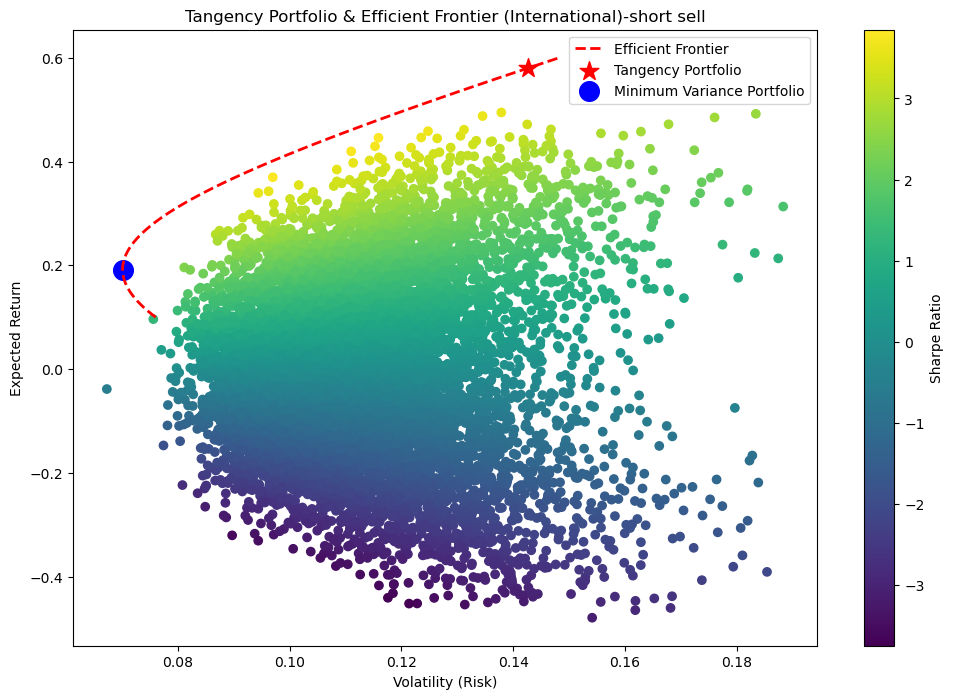

Tangency Portfolio Return: 0.5797979797979799
Tangency Portfolio Volatility: 0.1425890046876965
Maximum Sharpe Ratio: 3.589322899889357


In [121]:
plt.figure(figsize=(12, 8))
plt.scatter(mc_portfolio_vol, mc_portfolio_returns, c=mc_sharpe_ratios, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Expected Return')

# Plot the Efficient Frontier
plt.plot(frontier_volatility, expected_returns_range, 'r--', linewidth=2, label='Efficient Frontier')

# Tangency Portfolio Calculation
risk_free_rate = 0.068  

# Find the index of the maximum Sharpe ratio on the efficient frontier
max_sharpe_idx = np.argmax(frontier_sharpe_ratios)
tangency_volatility = frontier_volatility[max_sharpe_idx]
tangency_return = expected_returns_range[max_sharpe_idx]

# Highlight the Tangency Portfolio on the Efficient Frontier
plt.scatter(tangency_volatility, tangency_return, color='red', marker='*', s=200, label='Tangency Portfolio')

# Plot the Minimum Variance Portfolio
plt.scatter(mvp_volatility, mvp_return, color='blue', marker='o', s=200, label='Minimum Variance Portfolio')

# Plot labels and legend
plt.legend()
plt.title('Tangency Portfolio & Efficient Frontier (International)-short sell')
plt.show()

# Output Tangency Portfolio details
print(f"Tangency Portfolio Return: {tangency_return}")
print(f"Tangency Portfolio Volatility: {tangency_volatility}")
print(f"Maximum Sharpe Ratio: {frontier_sharpe_ratios[max_sharpe_idx]}")

In [122]:

tangency_weights = frontier_weights[max_sharpe_idx]
tangency_weights

# tangency_weights = mc_weights[np.argmax(mc_sharpe_ratios)]
# # tangency_weights

array([ 0.09249579,  0.15862503,  0.0961689 ,  0.17036991, -0.0516702 ,
        0.22752726, -0.07206851, -0.03055775,  0.30900728,  0.10010228])

### Tangency Portfolio vs NIFTY 50 (Short Selling)

In [123]:
weighted_returns = log_rets * tangency_weights
tangency_portfolio_daily_returns = weighted_returns.sum(axis=1)
tangency_cumulative_returns = (1 + tangency_portfolio_daily_returns).cumprod()

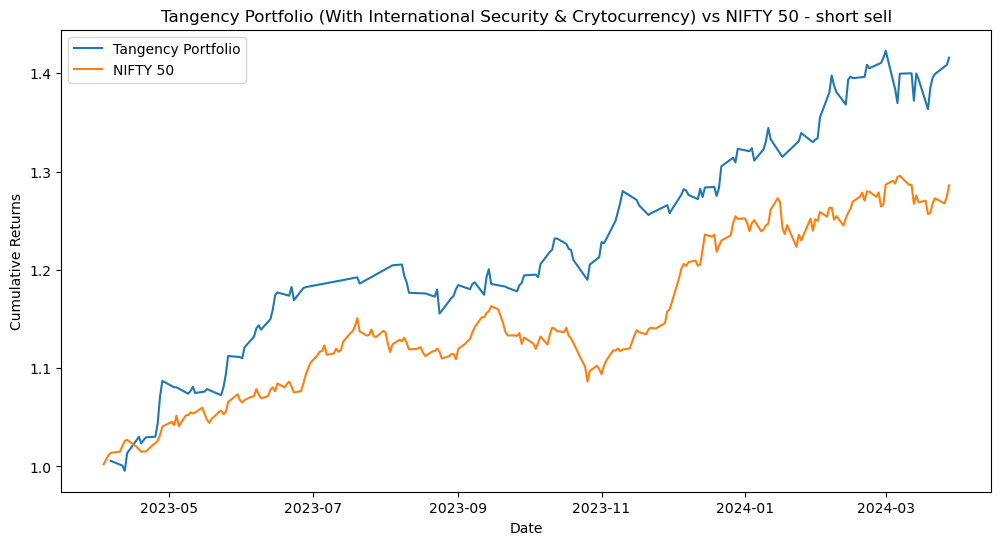

In [124]:
plt.figure(figsize=(12,6))
plt.plot(tangency_cumulative_returns, label='Tangency Portfolio')
plt.plot(index_cumm_returns, label='NIFTY 50')
plt.title('Tangency Portfolio (With International Security & Crytocurrency) vs NIFTY 50 - short sell')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()